In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# 두 개의 레이어를 가진 모델

## Architecture

### Feedforward

$$
\hat{y}  = \sigma (W_2 \sigma (W_1  x ) )
$$


$$
\mathbf{loss}( y, \hat{y} )  = \rVert y - \hat{y} \rVert_2^2
$$

### Backpropagation


- $x$: input
- $z_1 = W_1  x$: 첫 번째 layer에서의 output (활성화 함수 통과 전)
- $z_2 = W_2 \sigma (W_1  x ) $: 두 번째 layer에서의 output (활성화 함수 통과 전)

\\
$$
\frac{d \mathbf{loss}}{d W_2} =  \frac{d \mathbf{loss}}{d \hat{y}} 
\cdot \frac{d \hat{y}}{d z_2} \cdot \frac{d z_2}{d W_2}
$$

$$
\frac{d \mathbf{loss}}{d W_1} =  \frac{d \mathbf{loss}}{d \hat{y}} 
\cdot \frac{d \hat{y}}{d z_2} \cdot \frac{d z_2}{d z_1} \cdot
\frac{d z_1}{d W_1}
$$


$$
\frac{d \mathbf{loss}}{d \hat{y}} = 2 \cdot (y - \hat{y})
$$

$$
\frac{d \hat{y}}{d z_2} = z_2 \cdot (1 - z_2)
$$

$$
\frac{d z_2}{d z_1} = W_2
$$

$$
\frac{d z_2}{d W_2} = z_1
$$

$$
\frac{d z_1}{d W_1} = x
$$




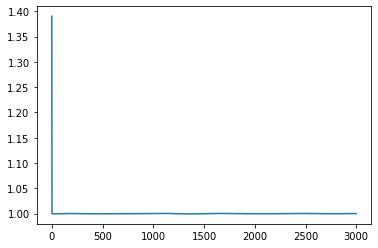

In [2]:
class NeuralNetwork:
    def __init__(self,x,y):
        self.input = x
        self.weight1 = np.random.rand(self.input.shape[1], 4)
        self.weight2 = np.random.rand(4,1)
        self.y = y
        self.y_hat = np.zeros(self.y.shape)
        self.epoch = 0
        self.loss_history = []
        
    def sigmoid(self,x):
        return 1/(1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1.0 - x)
        
    def feedforward(self):
        self.z_1 = self.sigmoid(np.dot(self.input, self.weight1))
        self.z_2 = np.dot(self.z_1, self.weight2)
        self.y_hat = self.sigmoid(self.z_2)

    def backpropagation(self):
        d_weight2 = np.dot(self.z_1.T, 2 * (self.y_hat - self.y)) * self.sigmoid_derivative(self.y_hat)
        d_weight1 = np.dot(self.input.T,  (np.dot(2 * (self.y_hat - self.y) * self.sigmoid_derivative(self.y_hat), self.weight2.T)))
        self.weight1 -= d_weight1
        self.weight2 -= d_weight2

    def save_loss(self):
        loss = np.sum((self.y_hat - self.y) ** 2)
        self.loss_history.append(loss)

X = np.array(
    [
     [0,0,1],
     [0,1,1],
     [1,0,1],
     [1,1,1]
    ]
)
y = np.array([[0],[1],[1],[0]])
nn = NeuralNetwork(X,y)

for i in range(3000):
    nn.feedforward()
    nn.backpropagation()
    nn.save_loss()

plt.plot(nn.loss_history)

# 세 개의 레이어를 가진 모델

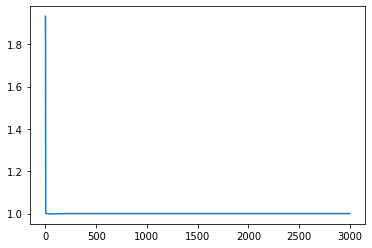

In [3]:
class NeuralNetwork:
    def __init__(self,x,y):
        self.input = x
        self.weight1 = np.random.rand(self.input.shape[1], 4)
        self.weight2 = np.random.rand(4, 4)
        self.weight3 = np.random.rand(4, 1)

        self.y = y
        self.y_hat = np.zeros(self.y.shape)
        self.epoch = 0
        self.loss_history = []
        
    def sigmoid(self,x):
        return 1/(1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1.0 - x)
        
    def feedforward(self):
        self.z_1 = self.sigmoid(np.dot(self.input, self.weight1))
        self.z_2 = np.dot(self.z_1, self.weight2)
        self.z_3 = np.dot(self.z_2, self.weight3)
        self.y_hat = self.sigmoid(self.z_3)

    def backpropagation(self):
        d_weight3 = np.dot(self.z_2.T, 2 * (self.y_hat - self.y)) * self.sigmoid_derivative(self.y_hat)
        d_weight2 = np.dot(self.z_1.T,  (np.dot(2 * (self.y_hat - self.y) * self.sigmoid_derivative(self.y_hat), self.weight3.T)))
        d_weight1 = np.dot(self.input.T, np.dot(self.weight2.T,  (np.dot(2 * (self.y_hat - self.y) * self.sigmoid_derivative(self.y_hat), self.weight3.T))))

        self.weight1 -= d_weight1
        self.weight2 -= d_weight2
        self.weight3 -= d_weight3

    def save_loss(self):
        loss = np.sum((self.y_hat - self.y) ** 2)
        self.loss_history.append(loss)

X = np.array(
    [
     [0,0,1],
     [0,1,1],
     [1,0,1],
     [1,1,1]
    ]
)
y = np.array([[0],[1],[1],[0]])
nn = NeuralNetwork(X,y)

for i in range(3000):
    nn.feedforward()
    nn.backpropagation()
    nn.save_loss()

plt.plot(nn.loss_history)

## TODO
### 1) Learning Rate를 적용한다면?
### 2) bias를 추가한다면?
